## Import libs

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the data into the train dataset

In [2]:
train_df = pd.read_csv("train.csv")

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


--> Age, Cabin, Embarked have the missing value

In [5]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Exploring unique data for each colum**

In [6]:
train_df['Pclass'].unique()

array([3, 1, 2])

In [7]:
train_df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [8]:
train_df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [9]:
train_df['Cabin'].nunique()

147

In [10]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

# Age data distribution

/Users/khuyen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


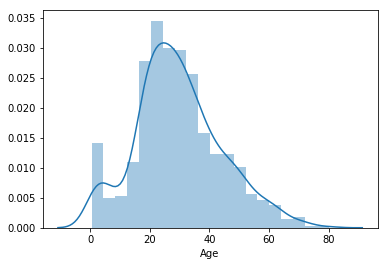

In [11]:
sns.distplot(train_df['Age'].dropna())

In [12]:
train_df['Age'].mean(skipna=True)

29.69911764705882

In [13]:
train_df['Age'].median()

28.0

# Cabin missing value

In [14]:
train_df['Cabin'].isnull().sum() / train_df.shape[0]

0.7710437710437711

# Embarked value

In [15]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

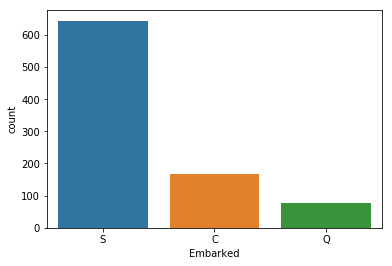

In [16]:
sns.countplot(x='Embarked', data=train_df)

# Refine the data for training

- Ignore Cabin as the missing value is too many, 77%
- Fill the missing value for Age with Median or Mean value (considering)
- For Embarked, most passengers are S, so fill S for the missing value

In [17]:
train_data = train_df.copy()

In [18]:
train_data.drop('Cabin', axis=1, inplace=True)
median_age = train_df["Age"].median(skipna=True)
train_data['Age'].fillna(median_age, inplace=True)
train_data['Embarked'].fillna('S', inplace=True)

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


/Users/khuyen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


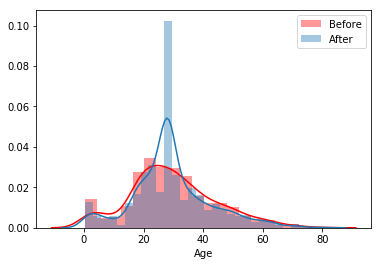

In [20]:
sns.distplot(train_df['Age'].dropna(), color='Red')
sns.distplot(train_data['Age'])
plt.legend(labels=['Before', 'After'])